## Importing the required Libraries

In this notebook we will be requiring basic libraries of pandas, numpy, scipy, random and matplotlib

In [25]:
import pandas as pd
import os
import numpy as np
from scipy import sparse
import random
import matplotlib.pyplot as plt

## Importing dataset

Here I have taken the latest movie rating dataset from https://grouplens.org/datasets/movielens/ which has ratings for more than 1 million movies from various users more can be infered from the link given above. We will be considering the first 10K reviews given by the users here because it turns out to be computationally expensive for small PC to compute such a big task and takes long time for computation.

In [26]:
df_ratings = pd.read_csv('ratings_latest.csv')

In [27]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
df_ratings_10k = df_ratings.head(10000)
df_ratings_10k

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
9995,66,248,3.0,1113190892
9996,66,255,0.5,1113188840
9997,66,260,2.5,1093747550
9998,66,272,3.5,1113190319


As we can see most of the data is sparse that means there are so many movies for which users have not rated or watched. Due to this reason we will take "0" in place those ratings where the user has not given any rating!

In [29]:
df_pivoted = df_ratings_10k.pivot(index='movieId',columns=['userId'],values=['rating'])
df_pivoted

rating                                          ...                    \
userId      1   2   3   4    5    6    7    8   9   10  ...   57   58  59  60   
movieId                                                 ...                     
1          4.0 NaN NaN NaN  4.0  NaN  4.5  NaN NaN NaN  ...  5.0  NaN NaN NaN   
2          NaN NaN NaN NaN  NaN  4.0  NaN  4.0 NaN NaN  ...  NaN  NaN NaN NaN   
3          4.0 NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN  ...  NaN  3.0 NaN NaN   
4          NaN NaN NaN NaN  NaN  3.0  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   
5          NaN NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN  ...  NaN  4.0 NaN NaN   
...        ...  ..  ..  ..  ...  ...  ...  ...  ..  ..  ...  ...  ...  ..  ..   
187541     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   
187593     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   
187595     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   
188301     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   
190183     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN NaN NaN   

                                     
userId   61   62   63   64  65   66  
movieId                              
1       NaN  NaN  5.0  4.0 NaN  4.0  
2       NaN  4.0  NaN  NaN NaN  NaN  
3       NaN  NaN  NaN  3.5 NaN  NaN  
4       NaN  NaN  NaN  NaN NaN  NaN  
5       NaN  NaN  NaN  NaN NaN  4.0  
...      ..  ...  ...  ...  ..  ...  
187541  NaN  NaN  NaN  NaN NaN  NaN  
187593  NaN  4.0  NaN  NaN NaN  NaN  
187595  NaN  4.0  NaN  NaN NaN  NaN  
188301  NaN  NaN  NaN  NaN NaN  NaN  
190183  NaN  NaN  NaN  NaN NaN  NaN  

[3218 rows x 66 columns]

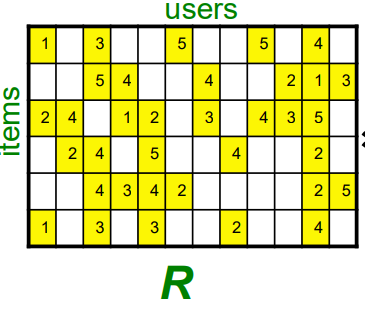

In [30]:
X = (df_pivoted.fillna(0)).to_numpy()
X

array([[4. , 0. , 0. , ..., 4. , 0. , 4. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4. , 0. , 0. , ..., 3.5, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In the below cell we will be counting number of movies and initializing average of the movies rating. Also biases for movies and users are also initialized

In [31]:
# Count contains all the movies that were rated
X_sparse = sparse.coo_matrix(X)
count = 0
for i,j,k in zip(X_sparse.row,X_sparse.col,X_sparse.data):
    count += 1
# Average rating calculation
mean_of_movies = []
for row in (range(X.shape[0])):
    count = 0
    summation = 0
    for i in range(X.shape[1]):
        summation += X[row][i]
        if X[row][i] != 0:
            count += 1
    mean_of_movies.append(summation/count)
total_rating_mean = sum(mean_of_movies)/X.shape[0]
print("Total Mean Rating",total_rating_mean)

# Number of users and Movies present is nothing but dimensions of X matrix where 
# Columns represent the users
# Rows represent the number of Movies
no_of_users = X.shape[1]
no_of_movies = X.shape[0]

# Bias for users and movies
user_biases = [random.uniform(0,1) for _ in range(no_of_users)]# User biases which are random values
movie_biases = [random.uniform(0,1) for _ in range(no_of_movies)]# Movie biases which are also random values
user_biases = list(map(lambda x: round(x,2),user_biases))# Rounding off to 2 significant digits
movie_biases = list(map(lambda x: round(x,2),movie_biases))# Rounding off to 2 significant digits     

## Sparse Matrix

Taking help of the scipy library we are creating a new matrix called X_Sparse which will have only the row, col and data values only which will be useful in fast computation of the algorithm instead of iterating in a double loop around users and movies

In [32]:
X_sparse = sparse.coo_matrix(X)

## Q and P matrices

We will be initializing P and Q matrices here which can be done either by using SVD or by using random value. Both will work as the optimization objective function determines the values by the end to decrease the loss that has occured!


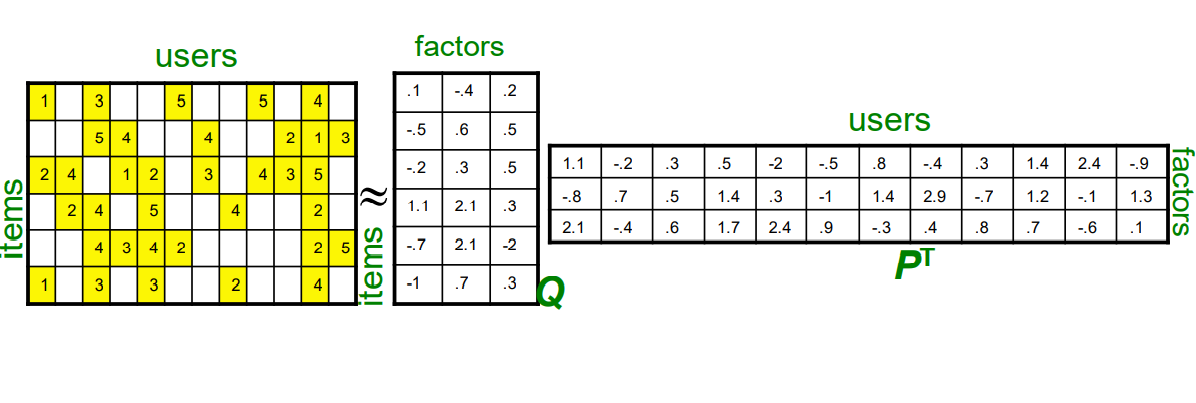

In [33]:
factors = 5 # Taking factors affecting as 5
# Q is the Movies x Factors matrix here which is randomly init
# P is the Factors x Users matrix which is randomly init
# U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
# Q = U
# P = np.matmul(np.diag(Sigma),VT)
Q = np.random.rand(no_of_movies,factors)
P = np.random.rand(factors,no_of_users)

### Loss Function 
The loss function computes according to the below markdown cell formula and results in the RMSE value of the error

In [34]:
# This is the RMSE loss function 
def lossFunction(no_of_users,no_of_movies,X_sparse,user_biases,movie_biases,P,Q,l1,l2,l3,l4):
    loss = 0
    for i,x,data in zip(X_sparse.row,X_sparse.col,X_sparse.data):
        if data>0:
            # We are only interested in data which the users have rated
            loss += (((data - (total_rating_mean + user_biases[x] + movie_biases[i] + np.dot(Q[i],P[:,x])))**2)+(l1*(Q[i].sum())**2+l2*(P[:,x].sum())**2+l3*(user_biases[x])**2 +l4*(movie_biases[i])**2))
    #print("This is loss",loss)
    return(np.sqrt(loss)*(1/count))

## Stochastic Gradient Descent and Gradient Calculation

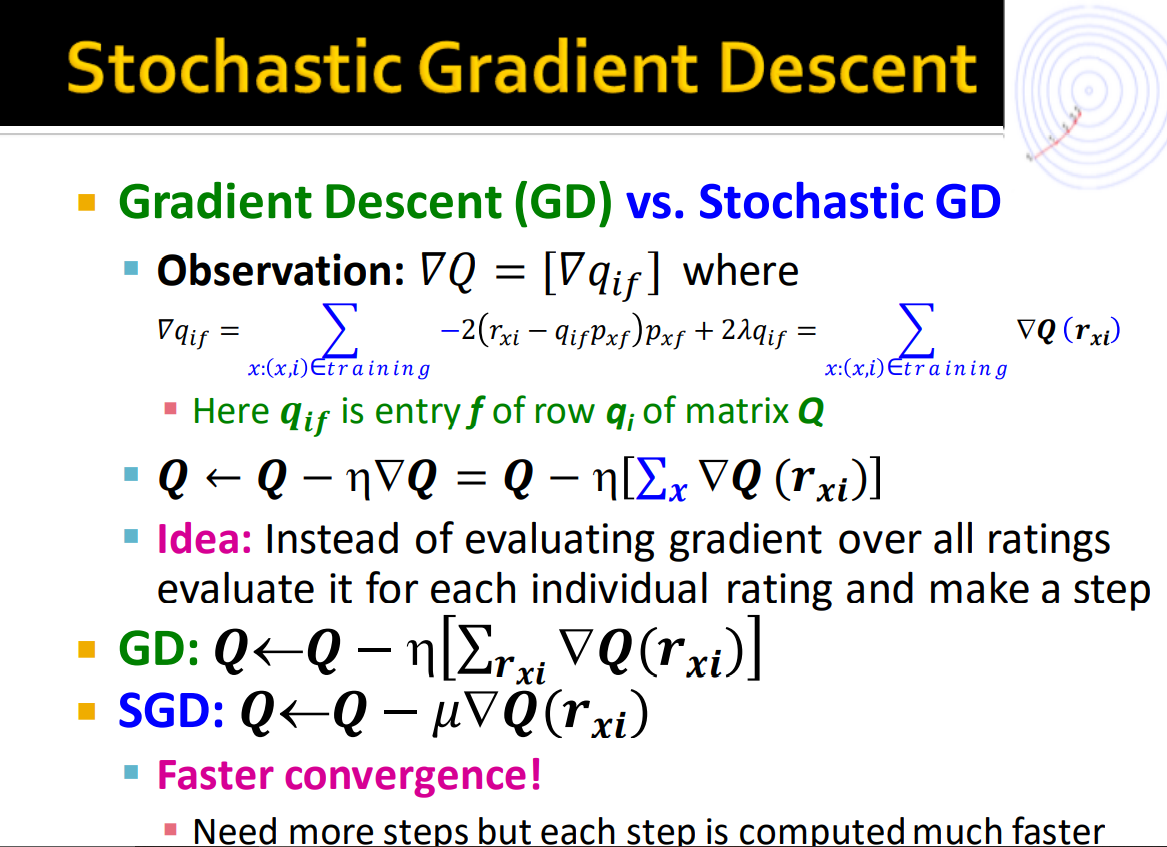

## Objective Function which need to be minimized 

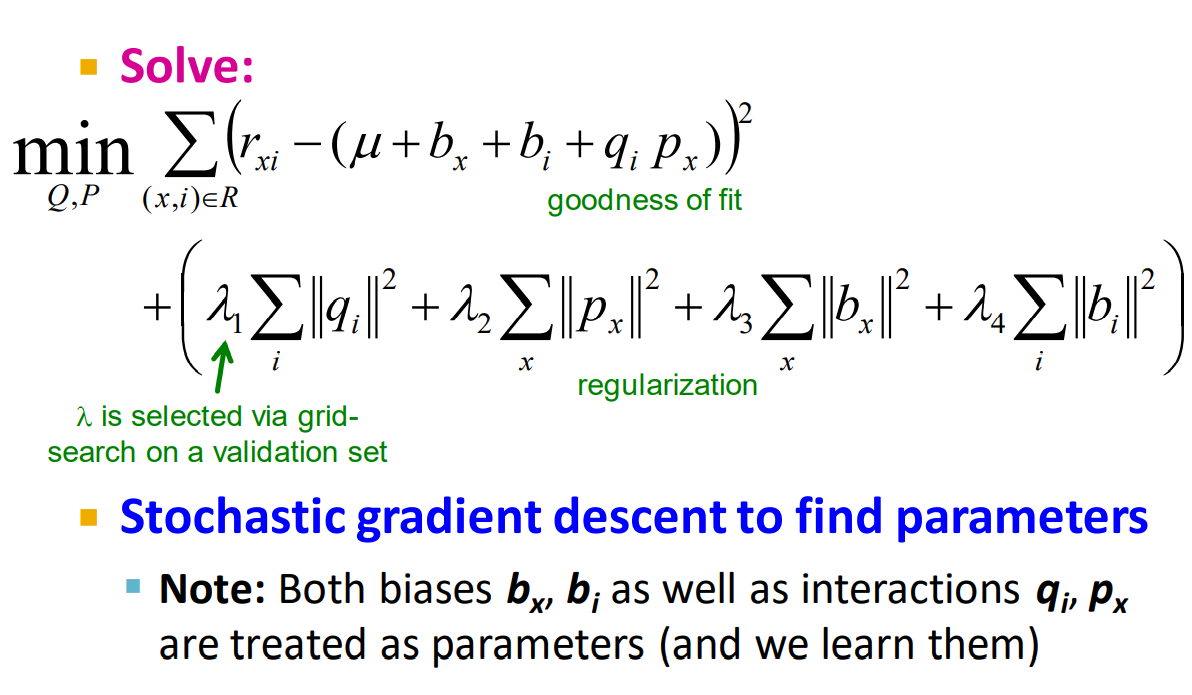

In [36]:
def fit(X_sparse,X,user_biases,movie_biases,no_of_users,no_of_movies,P,Q):
    l1 = 0.001
    l2 = 0.003
    l3 = 0.001
    l4 = 0.002
    epochs = 100
    loss = []
    alpha = 0.001
    print("initial loss",lossFunction(no_of_users,no_of_movies,X_sparse,user_biases,movie_biases,P,Q,l1,l2,l3,l4))
    for epoch in range(epochs):
        for i,x,data in zip(X_sparse.row,X_sparse.col,X_sparse.data):
            # As we are dealing with sparse data we are using scipy X_Sparse
            # row denotes movies
            # col users
            # data ratings
            if data>0:

                # rating not 0 for any movie 
                delQ_SG = np.zeros((Q.shape[0],Q.shape[1]))# delQ has same shape as Q but all values are 0
                delP_SG = np.zeros((P.shape[0],P.shape[1]))# delP has same shape as that of P but all values are 0
                del_bx = np.zeros(no_of_users)# del_bx is the derivative vector for biases of users
                del_bi = np.zeros(no_of_movies)# del_bi is the derivative vector for biases of the movies

                # Calculation of derivatives of Q and P matrices we are using SGD that is
                # why updation only takes place for only corresponding tuple i and x not for all

                delQ_SG[i,:] = -2*(data - np.dot(Q[i,:],P[:,x]))*P[:,x] +2*l1*Q[i,:]
                delP_SG[:,x] = -2*(data - np.dot(Q[i,:],P[:,x]))*Q[i,:] +2*l2*P[:,x]

                # Calculation of derivative for user biases and movies biases as stated above using the formulae
                del_bx[x] = -2*(data - (total_rating_mean + user_biases[x] + movie_biases[i] + np.dot(Q[i],P[:,x]))) + 2*l3*user_biases[x]
                del_bi[i] = -2*(data - (total_rating_mean + user_biases[x] + movie_biases[i] + np.dot(Q[i],P[:,x]))) + 2*l4*movie_biases[i]

                # Updation of the P and Q matrix values
                P[:,x] = P[:,x] - alpha * delP_SG[:,x]
                Q[i,:] = Q[i,:] - alpha * delQ_SG[i,:]

                # Updation of biases matrices values
                user_biases = user_biases - alpha * del_bx
                movie_biases = movie_biases - alpha * del_bi
        # Loss value after each iteration!       
        loss.append(lossFunction(no_of_users,no_of_movies,X_sparse,user_biases,movie_biases,P,Q,l1,l2,l3,l4))
fit(X_sparse,X,user_biases,movie_biases,no_of_users,no_of_movies,P,Q)                

initial loss 247.7476457230669


### Loss values over the epochs

In [37]:
loss

[222.5976924022212,
 194.79993918316205,
 176.45915249280628,
 163.55237652921699,
 153.30816410595259,
 144.77625517839357,
 137.6270347429999,
 131.66392009022692,
 126.70353286791313,
 122.56672042399425,
 119.09049439465963,
 116.13665550835682,
 113.59393270232803,
 111.37577393473805,
 109.41623913229742,
 107.66559100247564,
 106.08636650790771,
 104.65019342397083,
 103.33535019207885,
 102.12495884465268,
 101.00567508113436,
 99.96675052745339,
 98.99936541129406,
 98.09615401590845,
 97.25086597284975,
 96.45812267097601,
 95.7132401294491,
 95.01209838401086,
 94.35104357920112,
 93.72681323664955,
 93.13647812075946,
 92.57739614772609,
 92.04717516875442,
 91.54364240507086,
 91.0648189604808,
 90.60889828253357,
 90.17422775098132,
 89.75929278635822,
 89.36270302200535,
 88.98318018986912,
 88.61954744753427,
 88.2707199303663,
 87.93569635460427,
 87.61355152898184,
 87.30342965687018,
 87.00453833004454,
 86.71614313035126,
 86.43756276780815,
 86.16816469366681,
 85.

## Loss vs Epochs Graph

We can clearly see that loss decreases by each iteration and converges to a point

Text(0.5, 0, 'Epochs')

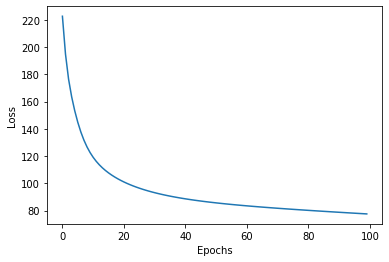

In [38]:
y = list(range(epochs))
plt.plot(y,loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")

### Validation
Here we are taking few ratings given by the user and then making them to 0 so that they will thought as not present by model and then we will train over the data given after wards as we know the real rating we can simply find the RMSE between the ground truth and the predicted value by the model to check the error!

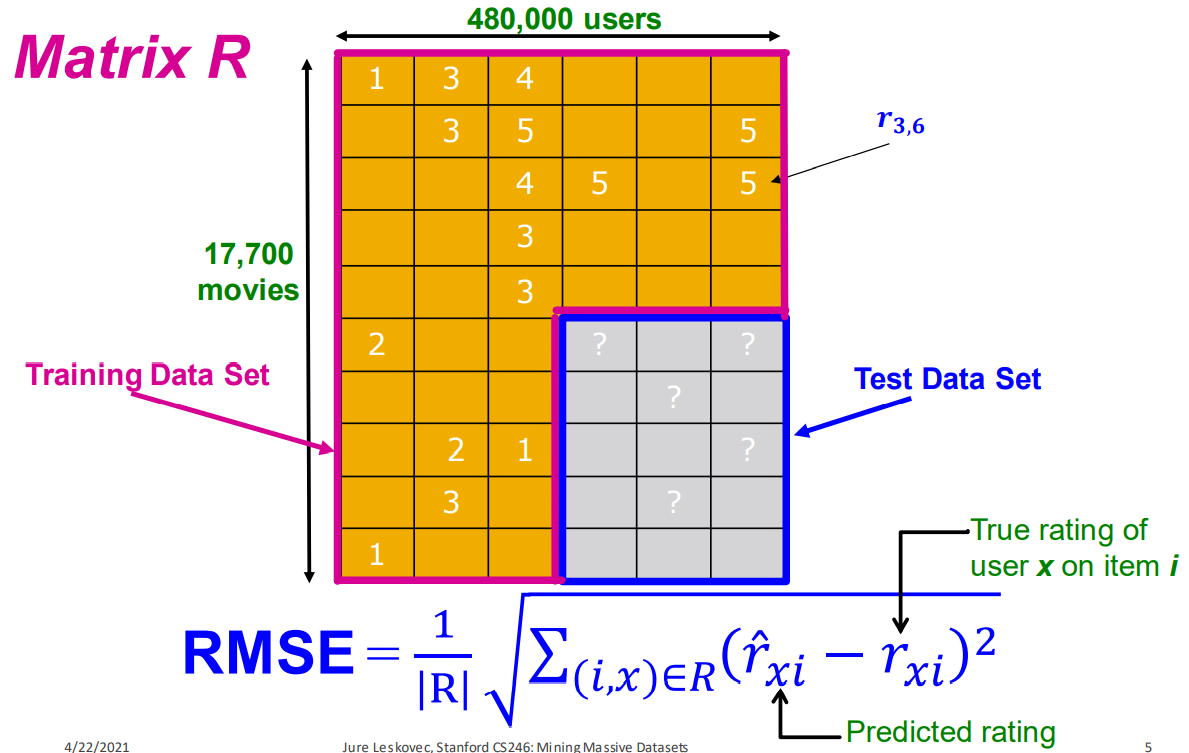

In [41]:
rows = []
cols = []
values = []
no_of_vals = 5
Q = np.random.rand(no_of_movies,factors)
P = np.random.rand(factors,no_of_users)
counter = 0
while counter!=no_of_vals:
    i = random.randint(0,no_of_movies-1)
    x = random.randint(0,no_of_users-1)
    if X[i][x] > 0:
        values.append(X[i][x])
        rows.append(i)
        cols.append(x)
        X[i][x] = 0
        counter += 1
X_sparse = sparse.coo_matrix(X)
fit(X_sparse,X,user_biases,movie_biases,no_of_users,no_of_movies,P,Q)
predicted = np.zeros((no_of_movies,no_of_users))
for i in range(no_of_movies):
    for x in range(no_of_users):
        predicted[i][x] = (total_rating_mean + user_biases[x] + movie_biases[i] + np.dot(Q[i],P[:,x]))
error = 0
for i in range(len(rows)):
    error += (values[i] - predicted[rows[i]][cols[i]])**2
error = np.sqrt(error)/len(rows)
print("The Error is",error)

initial loss 244.6729262905175
The Error is 2.153672653293898
